In [28]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point

# Data Exploration

In [29]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [30]:
sales = pd.read_csv("./data/ventas.csv", names=["timestamp", "restaurant_id", "amount"])
sales

,timestamp,restaurant_id,amount
0,1420066893000,57,160.90
1,1420067011000,97,111.67
2,1420067190000,38,59.66
3,1420067213000,71,243.20
4,1420067268000,72,94.59
...,...,...,...
1181030,1435701313000,36,217.80
1181031,1435701328000,58,140.92
1181032,1435701347000,2,96.67
1181033,1435701397000,29,281.24


In [31]:
restaurants = pd.read_csv("./data/restaurantes.csv", index_col='id')
restaurants = gpd.GeoDataFrame(restaurants, geometry=gpd.points_from_xy(restaurants.long, restaurants.lat))

In [32]:
restaurants

,punto,lat,long,geometry
id,,,,
1,01010000008F9911990F1F0140E390BF99FAAA4440,41.335773,2.140166,POINT (2.14017 41.33577)
2,0101000000F71502CAB7E700401E3EA2CB72B64440,41.425378,2.113144,POINT (2.11314 41.42538)
3,01010000003633BD643B0E0140C1ED277D08A64440,41.297134,2.131949,POINT (2.13195 41.29713)
4,01010000003C83DF8E97070140C9514B06CCB54440,41.420289,2.128707,POINT (2.12871 41.42029)
5,0101000000ECF871CFE8BE0040A0F4FF8D4DAA4440,41.330492,2.093217,POINT (2.09322 41.33049)
...,...,...,...,...
96,0101000000F831055E111421C0C9EB2588B2704540,42.880448,-8.539195,POINT (-8.53920 42.88045)
97,01010000004C7CA189470321C05DFBE3A2776F4540,42.870839,-8.506405,POINT (-8.50641 42.87084)
98,010100000091F69B79AE0121C0970202C2506C4540,42.846215,-8.503284,POINT (-8.50328 42.84621)


<AxesSubplot:>

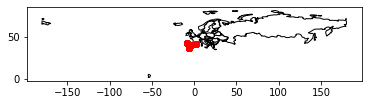

In [33]:
ax = world[world.continent == 'Europe'].plot(color='white', edgecolor='black')
restaurants.plot(ax=ax, color='red')

In [34]:
campaigns = pd.read_csv("./data/publicidad.csv", names=["timestamp", "lat", "long", "volume"])
campaigns = gpd.GeoDataFrame(campaigns, geometry=gpd.points_from_xy(campaigns.long, campaigns.lat))

In [35]:
campaigns.head()

,timestamp,lat,long,volume,geometry
0,1420099740000,42.898177,-8.512549,2116,POINT (-8.51255 42.89818)
1,1420099800000,37.359507,-5.937782,253,POINT (-5.93778 37.35951)
2,1420099920000,41.414480,2.149441,1018,POINT (2.14944 41.41448)
3,1420099980000,40.404021,-3.680018,16,POINT (-3.68002 40.40402)
4,1420100280000,41.308698,2.149767,1264,POINT (2.14977 41.30870)


<AxesSubplot:>

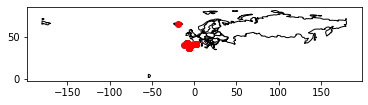

In [36]:
ax = world[world.continent == 'Europe'].plot(color='white', edgecolor='black')
campaigns.plot(ax=ax, color='red')

In [37]:
sales_restaurants_by_id = sales.merge(restaurants, left_on='restaurant_id', right_on='id', how='left')
sales_geo = gpd.GeoDataFrame(sales_restaurants_by_id)
sales_geo

,timestamp,restaurant_id,amount,punto,lat,long,geometry
0,1420066893000,57,160.90,01010000008EBFFED63A1218C057C5DA4422B14240,37.383858,-6.017803,POINT (-6.01780 37.38386)
1,1420067011000,97,111.67,01010000004C7CA189470321C05DFBE3A2776F4540,42.870839,-8.506405,POINT (-8.50641 42.87084)
2,1420067190000,38,59.66,01010000001A1C6642265C0DC09452AFC93D374440,40.431573,-3.669995,POINT (-3.66999 40.43157)
3,1420067213000,71,243.20,01010000002A19B3D31FC317C0048B2B6248B74240,37.431896,-5.940551,POINT (-5.94055 37.43190)
4,1420067268000,72,94.59,0101000000B4747A6058AC17C067B188682CB54240,37.415418,-5.918306,POINT (-5.91831 37.41542)
...,...,...,...,...,...,...,...
1181030,1435701313000,36,217.80,01010000002EB2FC12E2970EC0D6AE95CF6A304440,40.378260,-3.824162,POINT (-3.82416 40.37826)
1181031,1435701328000,58,140.92,0101000000C96DF5F78DC017C0E0EC563EC8B04240,37.381111,-5.938042,POINT (-5.93804 37.38111)
1181032,1435701347000,2,96.67,0101000000F71502CAB7E700401E3EA2CB72B64440,41.425378,2.113144,POINT (2.11314 41.42538)
1181033,1435701397000,29,281.24,0101000000CE688D58B6880EC070F934C9B4374440,40.435205,-3.816754,POINT (-3.81675 40.43520)


In [38]:
sales_geo[sales_geo.geometry.isnull()]

,timestamp,restaurant_id,amount,punto,lat,long,geometry
914,1420097186000,0,279.46,NaN,NaN,NaN,None
977,1420097329000,0,161.19,NaN,NaN,NaN,None
1297,1420098136000,0,257.29,NaN,NaN,NaN,None
1342,1420098221000,0,256.16,NaN,NaN,NaN,None
1502,1420098581000,0,136.42,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...
1179853,1435691802000,0,91.76,NaN,NaN,NaN,None
1180255,1435692777000,0,39.73,NaN,NaN,NaN,None
1180486,1435693351000,0,230.83,NaN,NaN,NaN,None
1180487,1435693353000,0,250.72,NaN,NaN,NaN,None


# Building the Algorithm on an example sale

In [39]:
ex_sale = sales_geo.loc[100000].copy()

In [40]:
dmax = 5 #km max distance between sales and campaign.
dtmax = 168#hours.

In [41]:
das = campaigns['geometry'].distance(ex_sale['geometry'])
das

0       6.052588
1       0.066623
2       9.008428
3       3.731504
4       8.962382
          ...   
2167    6.050800
2168    8.896976
2169    6.037222
2170    8.947803
2171    0.020708
Length: 2172, dtype: float64

In [42]:
dtas = pd.Series([(ex_sale['timestamp'] - campaign_timestamp)/3600000 for campaign_timestamp in campaigns['timestamp']])
dtas

0        360.163889
1        360.147222
2        360.113889
3        360.097222
4        360.013889
           ...     
2167   -3959.069444
2168   -3959.086111
2169   -3959.119444
2170   -3959.152778
2171   -3959.202778
Length: 2172, dtype: float64

In [43]:
pas = campaigns['volume']
pas

0       2116
1        253
2       1018
3         16
4       1264
        ... 
2167    2571
2168    2677
2169    2608
2170     720
2171    1897
Name: volume, Length: 2172, dtype: int64

In [44]:
stg_values = pd.DataFrame({
        "das" : das,
        "dtas": dtas,
        "pas" : pas,
    })
stg_values

,das,dtas,pas
0,6.052588,360.163889,2116
1,0.066623,360.147222,253
2,9.008428,360.113889,1018
3,3.731504,360.097222,16
4,8.962382,360.013889,1264
...,...,...,...
2167,6.050800,-3959.069444,2571
2168,8.896976,-3959.086111,2677
2169,6.037222,-3959.119444,2608
2170,8.947803,-3959.152778,720


In [45]:
ex_sale_values = stg_values[(stg_values['das']) <= dmax & (stg_values['dtas'] <= dtmax) & (stg_values['dtas'] > 0 )].copy()
ex_sale_values

,das,dtas,pas
107,0.096240,167.863889,1954
109,0.015492,144.130556,755
112,0.033291,144.080556,1167
114,0.047181,143.997222,130
122,0.070571,120.080556,831
131,0.088761,119.763889,2982
133,0.068475,96.130556,457
138,0.063158,96.047222,8
149,0.010036,72.063889,229
157,0.098097,48.113889,1140


In [46]:
numerators = ex_sale_values['pas']/((ex_sale_values['das']/dmax)**2 + (ex_sale_values['dtas']/dtmax)**2)
numerators

ex_sale_values['das']/dmax

107    0.019248
109    0.003098
112    0.006658
114    0.009436
122    0.014114
131    0.017752
133    0.013695
138    0.012632
149    0.002007
157    0.019619
159    0.001660
167    0.000926
173    0.006742
175    0.018309
176    0.019067
182    0.012869
186    0.013439
Name: das, dtype: float64

In [50]:
denominator = numerators.sum()
denominator

18084956.47399354

In [51]:
effectiveness = numerators / denominator * ex_sale['amount']


In [52]:
campaigns['effectiveness'] = effectiveness
campaigns[campaigns['effectiveness'].notnull()]

,timestamp,lat,long,volume,geometry,effectiveness
107,1420792020000,37.404649,-6.021589,1954,POINT (-6.02159 37.40465),0.022980
109,1420877460000,37.417394,-5.940895,755,POINT (-5.94090 37.41739),0.012048
112,1420877640000,37.392195,-5.924567,1167,POINT (-5.92457 37.39220),0.018635
114,1420877940000,37.378505,-5.933250,130,POINT (-5.93325 37.37851),0.002078
122,1420964040000,37.396147,-5.991848,831,POINT (-5.99185 37.39615),0.019098
131,1420965180000,37.356490,-5.983611,2982,POINT (-5.98361 37.35649),0.068878
133,1421050260000,37.362092,-5.953823,457,POINT (-5.95382 37.36209),0.016385
138,1421050560000,37.362726,-5.919387,8,POINT (-5.91939 37.36273),0.000287
149,1421136900000,37.420868,-5.918620,229,POINT (-5.91862 37.42087),0.014618
157,1421223120000,37.348352,-5.988385,1140,POINT (-5.98839 37.34835),0.162490


In [53]:
campaigns['effectiveness'].describe()

count     17.000000
mean      12.495294
std       42.894909
min        0.000287
25%        0.016385
50%        0.068257
75%        0.212969
max      175.784275
Name: effectiveness, dtype: float64

# 1a Implementación: Iterando sobre las ventas.

In [55]:
def load_data():
    sales = pd.read_csv("./data/ventas.csv", names=["timestamp", "restaurant_id", "amount" ])
    restaurants = pd.read_csv("./data/restaurantes.csv")
    campaigns = pd.read_csv("./data/publicidad.csv", names=["timestamp", "lat", "long", "volume"])
    return {
        "sales": sales,
        "restaurants": restaurants,
        "campaigns":campaigns
    }

def _build_geodf(df):
    return gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.long, df.lat))

def _add_sales_geopoints(sales, restaurants):
    sales_with_restaurants = sales.merge(restaurants, left_on='restaurant_id', right_on='id', how='left')
    sales_geo = gpd.GeoDataFrame(sales_with_restaurants)
    sales = sales_geo[sales_geo['geometry'].notnull()].copy()
    return sales

def raw_data_prep(data):
    data = load_data()
    restaurants = _build_geodf(data['restaurants'])
    campaigns = _build_geodf(data['campaigns'])
    sales = _add_sales_geopoints(data['sales'], restaurants)
    return {
        "sales": sales,
        "restaurants": restaurants,
        "campaigns":campaigns
    }

def _build_algorithm_operands(sale, campaigns):
    das = campaigns['geometry'].distance(sale['geometry'])
    dtas = pd.Series([(sale['timestamp'] - campaign_timestamp)/3600000 for campaign_timestamp in campaigns['timestamp']], dtype='float64')
    pas = campaigns['volume']
    return pd.DataFrame({
        "das" : das,
        "dtas": dtas,
        "pas" : pas,
    })

def _filter_relevant_campaigns(operands, dmax, dtmax):
    return operands[(operands['das']) <= dmax & (operands['dtas'] <= dtmax) & (operands['dtas'] > 0 )].copy()

def _add_campaigns_effectiveness(effectiveness, campaigns):
    if 'effectiveness' not in campaigns.columns:
        campaigns['effectiveness'] = pd.Series([np.NaN])
    campaigns['effectiveness'] = campaigns['effectiveness'].add(effectiveness, fill_value=0)
    return campaigns    

def compute_effectiveness(sale, campaigns, dmax=5, dtmax=168):
    operands = _build_algorithm_operands(sale, campaigns)
    operands = _filter_relevant_campaigns(operands, dmax, dtmax)
    numerators = operands['pas']/((operands['das']/dmax)**2 + (operands['dtas']/dtmax)**2)
    denominator = numerators.sum()
    operands['effectiveness'] = numerators / denominator * operands['pas']
    _add_campaigns_effectiveness(operands['effectiveness'], campaigns)
    return campaigns

# Pruebas

In [57]:
raw_data = load_data()
data = raw_data_prep(raw_data)

In [58]:
%%time
compute_effectiveness(data['sales'].loc[10000], data['campaigns'])

CPU times: user 31.4 ms, sys: 2.84 ms, total: 34.3 ms
Wall time: 32.3 ms


,timestamp,lat,long,volume,geometry,effectiveness
0,1420099740000,42.898177,-8.512549,2116,POINT (-8.51255 42.89818),NaN
1,1420099800000,37.359507,-5.937782,253,POINT (-5.93778 37.35951),NaN
2,1420099920000,41.414480,2.149441,1018,POINT (2.14944 41.41448),13.434727
3,1420099980000,40.404021,-3.680018,16,POINT (-3.68002 40.40402),NaN
4,1420100280000,41.308698,2.149767,1264,POINT (2.14977 41.30870),21.139320
...,...,...,...,...,...,...
2167,1435648980000,42.888337,-8.529124,2571,POINT (-8.52912 42.88834),NaN
2168,1435649040000,41.337575,2.063059,2677,POINT (2.06306 41.33758),NaN
2169,1435649160000,42.865220,-8.545966,2608,POINT (-8.54597 42.86522),NaN
2170,1435649280000,41.416287,2.080868,720,POINT (2.08087 41.41629),NaN


In [145]:
%%time
effectiveness = [compute_effectiveness(sale, data['campaigns']) for idx, sale in data['sales'][10000:10100].iterrows()]

CPU times: user 1.81 s, sys: 12 µs, total: 1.81 s
Wall time: 1.81 s


In [124]:
%%time
effectiveness = [compute_effectiveness(sale, data['campaigns']) for idx, sale in data['sales'][10000:11000].iterrows()]

CPU times: user 17.8 s, sys: 0 ns, total: 17.8 s
Wall time: 17.8 s


In [125]:
%%time
effectiveness = [compute_effectiveness(sale, data['campaigns']) for idx, sale in data['sales'][10000:20000].iterrows()]

CPU times: user 2min 57s, sys: 6.08 ms, total: 2min 57s
Wall time: 2min 57s


In [134]:
effectiveness[0]

,timestamp,lat,long,volume,geometry,effectiveness
0,1420099740000,42.898177,-8.512549,2116,POINT (-8.51255 42.89818),1.223800e+06
1,1420099800000,37.359507,-5.937782,253,POINT (-5.93778 37.35951),4.368746e+03
2,1420099920000,41.414480,2.149441,1018,POINT (2.14944 41.41448),3.891512e+04
3,1420099980000,40.404021,-3.680018,16,POINT (-3.68002 40.40402),2.067452e+01
4,1420100280000,41.308698,2.149767,1264,POINT (2.14977 41.30870),6.033798e+04
...,...,...,...,...,...,...
2167,1435648980000,42.888337,-8.529124,2571,POINT (-8.52912 42.88834),NaN
2168,1435649040000,41.337575,2.063059,2677,POINT (2.06306 41.33758),NaN
2169,1435649160000,42.865220,-8.545966,2608,POINT (-8.54597 42.86522),NaN
2170,1435649280000,41.416287,2.080868,720,POINT (2.08087 41.41629),NaN


# 2a implementación: sin iterrows

In [59]:
def load_data():
    sales = pd.read_csv("./data/ventas.csv", names=["timestamp", "restaurant_id", "amount" ])
    restaurants = pd.read_csv("./data/restaurantes.csv")
    campaigns = pd.read_csv("./data/publicidad.csv", names=["timestamp", "lat", "long", "volume"])
    return {
        "sales": sales,
        "restaurants": restaurants,
        "campaigns":campaigns
    }

def _build_geodf(df):
    return gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.long, df.lat))

def _add_sales_geopoints(sales, restaurants):
    sales_with_restaurants = sales.merge(restaurants, left_on='restaurant_id', right_on='id', how='left')
    sales_geo = gpd.GeoDataFrame(sales_with_restaurants)
    sales = sales_geo[sales_geo['geometry'].notnull()].copy()
    return sales

def raw_data_prep(data):
    data = load_data()
    restaurants = _build_geodf(data['restaurants'])
    campaigns = _build_geodf(data['campaigns'])
    sales = _add_sales_geopoints(data['sales'], restaurants)
    return {
        "sales": sales,
        "restaurants": restaurants,
        "campaigns":campaigns
    }

def _build_algorithm_operands(time, geom, campaigns):
    das = campaigns['geometry'].distance(geom)
    dtas = pd.Series([(time - campaign_timestamp)/3600000 for campaign_timestamp in campaigns['timestamp']], dtype='float64')
    pas = campaigns['volume']
    return pd.DataFrame({
        "das" : das,
        "dtas": dtas,
        "pas" : pas,
    })

def _filter_relevant_campaigns(operands, dmax, dtmax):
    return operands[(operands['das']) <= dmax & (operands['dtas'] <= dtmax) & (operands['dtas'] > 0 )].copy()

def _add_campaigns_effectiveness(effectiveness, campaigns):
    if 'effectiveness' not in campaigns.columns:
        campaigns['effectiveness'] = pd.Series([np.NaN])
    campaigns['effectiveness'] = campaigns['effectiveness'].add(effectiveness, fill_value=0)
    return campaigns    

def compute_effectiveness(time, geom, campaigns, dmax=5, dtmax=168):
    operands = _build_algorithm_operands(time, geom, campaigns)
    operands = _filter_relevant_campaigns(operands, dmax, dtmax)
    numerators = operands['pas']/((operands['das']/dmax)**2 + (operands['dtas']/dtmax)**2)
    denominator = numerators.sum()
    operands['effectiveness'] = numerators / denominator * operands['pas']
    _add_campaigns_effectiveness(operands['effectiveness'], campaigns)
    return campaigns

In [60]:
raw_data = load_data()
data = raw_data_prep(raw_data)

In [61]:
%%time
sales = data['sales']
campaigns = data['campaigns']
ef = compute_effectiveness(sales['timestamp'].loc[10000], sales['geometry'].loc[10000], campaigns)

CPU times: user 25.4 ms, sys: 408 µs, total: 25.8 ms
Wall time: 23.6 ms


In [64]:
%%time
sales = data['sales']
campaigns = data['campaigns']
effectiveness = [compute_effectiveness(time, geom, campaigns) for time, geom in zip(sales['timestamp'][10000:10100], sales['geometry'][10000:10100]) ]

CPU times: user 1.41 s, sys: 2.7 ms, total: 1.42 s
Wall time: 1.41 s


In [65]:
%%time
sales = data['sales']
campaigns = data['campaigns']
effectiveness = [compute_effectiveness(time, geom, campaigns) for time, geom in zip(sales['timestamp'][10000:11000], sales['geometry'][10000:11000]) ]

CPU times: user 13.5 s, sys: 0 ns, total: 13.5 s
Wall time: 13.5 s


In [159]:
%%time
sales = data['sales']
campaigns = data['campaigns']
effectiveness = [compute_effectiveness(time, geom, campaigns) for time, geom in zip(sales['timestamp'][10000:20000], sales['geometry'][10000:20000]) ]

CPU times: user 2min 11s, sys: 0 ns, total: 2min 11s
Wall time: 2min 11s


# 3a Implementación. Iterando por las campañas para calcular todas las ventas afectadas por una campaña.

In [360]:
def load_data():
    sales = pd.read_csv("./data/ventas.csv", names=["timestamp", "restaurant_id", "amount" ])
    restaurants = pd.read_csv("./data/restaurantes.csv")
    campaigns = pd.read_csv("./data/publicidad.csv", names=["timestamp", "lat", "long", "volume"])
    return {
        "sales": sales,
        "restaurants": restaurants,
        "campaigns":campaigns
    }

def _build_geodf(df):
    return gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.long, df.lat))

def _prepare_sales(data):
    restaurants = _build_geodf(data['restaurants'])
    sales = data['sales'].merge(restaurants, left_on='restaurant_id', right_on='id', how='left')
    sales = gpd.GeoDataFrame(sales)
    sales = sales[sales['geometry'].notnull()].copy()
    #sales.set_index('timestamp', inplace=True)
    return sales
    
def _prepare_campaigns(data):
    campaigns = _build_geodf(data['campaigns'])
    #campaigns.set_index(['timestamp'], inplace=True)
    return campaigns
    
def raw_data_prep(data):
    data = load_data()
    campaigns = _prepare_campaigns(data)
    sales = _prepare_sales(data)
    return {
        "sales": sales,
        "campaigns":campaigns
    }

def _build_algorithm_operands(campaign, sales):
    campaign_geometry = campaign['geometry']
    campaign_timestamp = campaign['timestamp']
    das = sales.distance(campaign_geometry)
    dtas = (sales['timestamp'] - campaign_timestamp)/3600000
    return pd.DataFrame({
        "das" : das,
        "dtas": dtas,
        "amount" : sales['amount']
    })

def _filter_relevant_sales(operands, dmax, dtmax):
    relevant_operands = operands[(operands['das'] <= dmax) & (operands['dtas'] <= dtmax) & (operands['dtas'] > 0 )]
    return relevant_operands

def add_campaign_effectiveness(campaigns, idx, effectiveness):
    if 'effectiveness' not in campaigns.columns:
        campaigns['effectiveness'] = pd.Series([np.NaN])
    campaign_effectiveness = sum(effectiveness)
    campaigns.loc[idx, 'effectiveness'] = campaign_effectiveness

def compute_effectiveness(campaign, sales, dmax=5, dtmax=168):
    operands = _build_algorithm_operands(campaign, sales)
    operands = _filter_relevant_sales(operands, dmax, dtmax)
    numerators = (campaign['volume'] / ((operands['das'] / dmax) * 2 + (operands['dtas'] / dtmax) ** 2)) 
    denominator = numerators.sum()
    effectiveness = numerators / denominator * operands['amount']
    return effectiveness

In [361]:
raw_data = load_data()
data = raw_data_prep(raw_data)

In [362]:
%%time
campaigns = data['campaigns'].loc[0:100].copy()
sales = data['sales'].copy()
for idx,campaign in campaigns.iterrows():
    effectiveness = compute_effectiveness(campaign, sales)
    add_campaign_effectiveness(campaigns, idx, effectiveness)

CPU times: user 1min 36s, sys: 30.3 ms, total: 1min 36s
Wall time: 1min 36s


In [366]:
%%time
campaigns = data['campaigns'].copy()
sales = data['sales'].copy()
for idx,campaign in campaigns.iterrows():
    effectiveness = compute_effectiveness(campaign, sales)
    add_campaign_effectiveness(campaigns, idx, effectiveness)

CPU times: user 11min 34s, sys: 64.4 ms, total: 11min 34s
Wall time: 11min 34s


In [367]:
campaigns[campaigns['effectiveness'].notnull()]

,timestamp,lat,long,volume,geometry,effectiveness
0,1420099740000,42.898177,-8.512549,2116,POINT (-8.51255 42.89818),149.724334
1,1420099800000,37.359507,-5.937782,253,POINT (-5.93778 37.35951),150.932075
2,1420099920000,41.414480,2.149441,1018,POINT (2.14944 41.41448),149.732765
3,1420099980000,40.404021,-3.680018,16,POINT (-3.68002 40.40402),151.181375
4,1420100280000,41.308698,2.149767,1264,POINT (2.14977 41.30870),150.843073
...,...,...,...,...,...,...
2167,1435648980000,42.888337,-8.529124,2571,POINT (-8.52912 42.88834),150.639749
2168,1435649040000,41.337575,2.063059,2677,POINT (2.06306 41.33758),149.108535
2169,1435649160000,42.865220,-8.545966,2608,POINT (-8.54597 42.86522),147.816585
2170,1435649280000,41.416287,2.080868,720,POINT (2.08087 41.41629),149.024134


In [368]:
campaigns.describe()

,timestamp,lat,long,volume,effectiveness
count,2.172000e+03,2172.000000,2172.000000,2172.000000,2172.000000
mean,1.427874e+12,40.521193,-4.018679,1498.843462,150.642023
std,4.513831e+09,2.068188,3.936007,876.499235,14.440593
min,1.420100e+12,37.342038,-18.779470,-999.000000,0.000000
25%,1.423988e+12,40.332527,-6.022305,745.500000,148.992292
50%,1.427873e+12,40.504060,-3.831118,1490.500000,150.024475
75%,1.431761e+12,41.459796,-3.555260,2262.750000,151.081047
max,1.435649e+12,64.732709,2.185951,3000.000000,606.161249


In [369]:
campaigns[['timestamp', 'lat', 'long', 'effectiveness']].to_csv('./output/campaigns_effectiveness.csv')